# Preamble


This notebook provides the core functionality of the SatLib library.
It includes creating a constellation object, propagating the constellation,
plotting the constellation, and calculating data for the object such as
relative positions between satellites and access calculations with ground
stations.

In [1]:
#Autoreload the libraries if edited
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
sys.path.append('../SatLib')
import satbox as sb

In [3]:
import numpy as np
import astropy
import astropy.units as u

In [4]:
from poliastro.plotting.static import StaticOrbitPlotter
from poliastro.plotting import OrbitPlotter3D, OrbitPlotter2D
%matplotlib notebook

# Test constellation propagation

## Create constellation object

In [5]:
# %Create a Walker constellation at 60 deg inclination, 4 total satellites, 2 planes, f parameter 1
i = 60 * u.deg
t = 4
p = 2
f = 1
alt = 600 * u.km
walker = sb.Constellation.from_walker(i, t, p, f, alt)

/Users/manweichan/Desktop/MITPhD/SAS/code/.venv/lib/python3.7/site-packages/astropy/units/decorators.py:253: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)


### Create constellation sim object

In [6]:
#Propagate for 5 days with time step of 60 seconds
t2propagate = 5 * u.day
tStep = 60 * u.s
walkerSim = sb.SimConstellation(walker, t2propagate, tStep, verbose = True)

### Propagate

In [7]:
# propagate the constellation
walkerSim.propagate()

### Plot 3D Initial Satellites

In [8]:
# Poliastro plotting tools
op = walkerSim.initConstellation.plot_sats([0,1,2,3])
op.show()

## Extract data from simulated constellation

In [9]:
outputData = walkerSim.get_relative_velocity_analysis()

/Users/manweichan/Desktop/MITPhD/SAS/code/.venv/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning:

invalid value encountered in arccos



outputData holds information regarding the relative positions and velocities
between satellites in the constellation.
<br>
<br>
In the first layer of the dictionary, the keys ['numSats'] tells you how
many satellites are in the constellation. The key ['satData'] stores all the
relevant data.
<br>
<br>
In ['satData'], the keys correspond to which two satellites are being
analyzed. For example ['0-1'] refer to the data referring to satellite 0 
and satellite 1.
<br>
<br>
The data held in the subsequent dictionary are <br>
['LOS'] - True/false array if there is LOS (not blocked by Earth<br>
['relPosition'] - The relative position data between satellites<br>
* relPosVec - the relative position vector
* relPosNorm - the norm of the relative position vector
* relPosMax - the maximum relative position vector magnitude
* relPosMin - the minimum relative position vector magnitude
* delRelPos - deprecated
['flag180'] - Deprecated (not in use)<br>

['relVel'] - The relative velocity relavant data including <br> 
* relVel - relative velocity magnitude
* slewRate - relative slewRate
* dopplerShift - doppler shift factor (multiply by emmitting frequency to get received frequency)
* velMax - maximum relative velocity magnitude
* velMin - minimum relative velocity magnitude
* slewMax - maximum slew rate
* slewMin - minimum slew rate
* dopplerMin - minimum doppler factor
* dopplerMax - maximum doppler factor

['adjacent'] - Boolean referring to if satellites IDs are consecutive <br> 
['timeDeltas'] - Time from start of propagation <br> 
['times] - Absolute times/dates


In [10]:
## Get relative position vectors between satellites 1 and 3
outputData['satData']['1-3']['relPosition']['relPosVec']

<CartesianRepresentation (x, y, z) in km
    [(-6978.1366    , -3489.0683    , 6043.24356668),
     (-6510.23346502, -3708.30736062, 5638.0599428 ),
     (-6014.80070565, -3911.94507563, 5209.10741111), ...,
     (13076.50054011, -1546.75587713, -810.57952588),
     (12857.94295866, -1039.84071271, -787.29824809),
     (12585.1060242 ,  -528.52428929, -760.79360308)]>

# Calculate Access

## Create a ground station

In [11]:
#Boston!
gs_lon = -71 * u.deg #longitude
gs_lat = 42 * u.deg #latitude
gs_h = 0 * u.m #height

gs1 = sb.GroundLoc(gs_lon, gs_lat, gs_h)
gs1.groundID = 1 #Assign this ground station the ID of 1

#Cancun!
gs_lon2 = -86 * u.deg #longitude
gs_lat2 = 21 * u.deg #latitude
gs_h2 = 0 * u.m #height

gs2 = sb.GroundLoc(gs_lon2, gs_lat2, gs_h2)
gs2.groundID = 2 #Assign this ground station the ID of 1

## Create a access constraint

In [12]:
# GS can only see satellite when it's above 20 deg in elevation
constraint_type = 'elevation'
constraint_angle = 20 * u.deg

## Run calculations

In [45]:
#Create an access object for the two ground stations
accessObject = sb.DataAccessConstellation(walkerSim, [gs1, gs2])

#Run method to calculate accesses between ground station given constraint types
accessObject.calc_access(constraint_type, constraint_angle)

In [46]:
#Find accessData Dictionary between satellite 0 and GS 0
accessObject.allAccessData[0].__dict__

{'sat': 6978 x 6978 km x 60.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT),
 'groundLoc': <satbox.GroundLoc at 0x15b08beb8>,
 'satID': 0,
 'groundLocID': 1,
 'groundIdentifier': None,
 'accessIntervals': array([[<Time object: scale='tt' format='jyear_str' value=J2000.001>,
         <Time object: scale='tt' format='jyear_str' value=J2000.001>],
        [<Time object: scale='tt' format='jyear_str' value=J2000.001>,
         <Time object: scale='tt' format='jyear_str' value=J2000.002>],
        [<Time object: scale='tt' format='jyear_str' value=J2000.002>,
         <Time object: scale='tt' format='jyear_str' value=J2000.002>],
        [<Time object: scale='tt' format='jyear_str' value=J2000.004>,
         <Time object: scale='tt' format='jyear_str' value=J2000.004>],
        [<Time object: scale='tt' format='jyear_str' value=J2000.005>,
         <Time object: scale='tt' format='jyear_str' value=J2000.005>],
        [<Time object: scale='tt' format='jyear_str' value=J2000.005>

### Tombstone plot access for the entire constellation for ground station 1

<IPython.core.display.Javascript object>


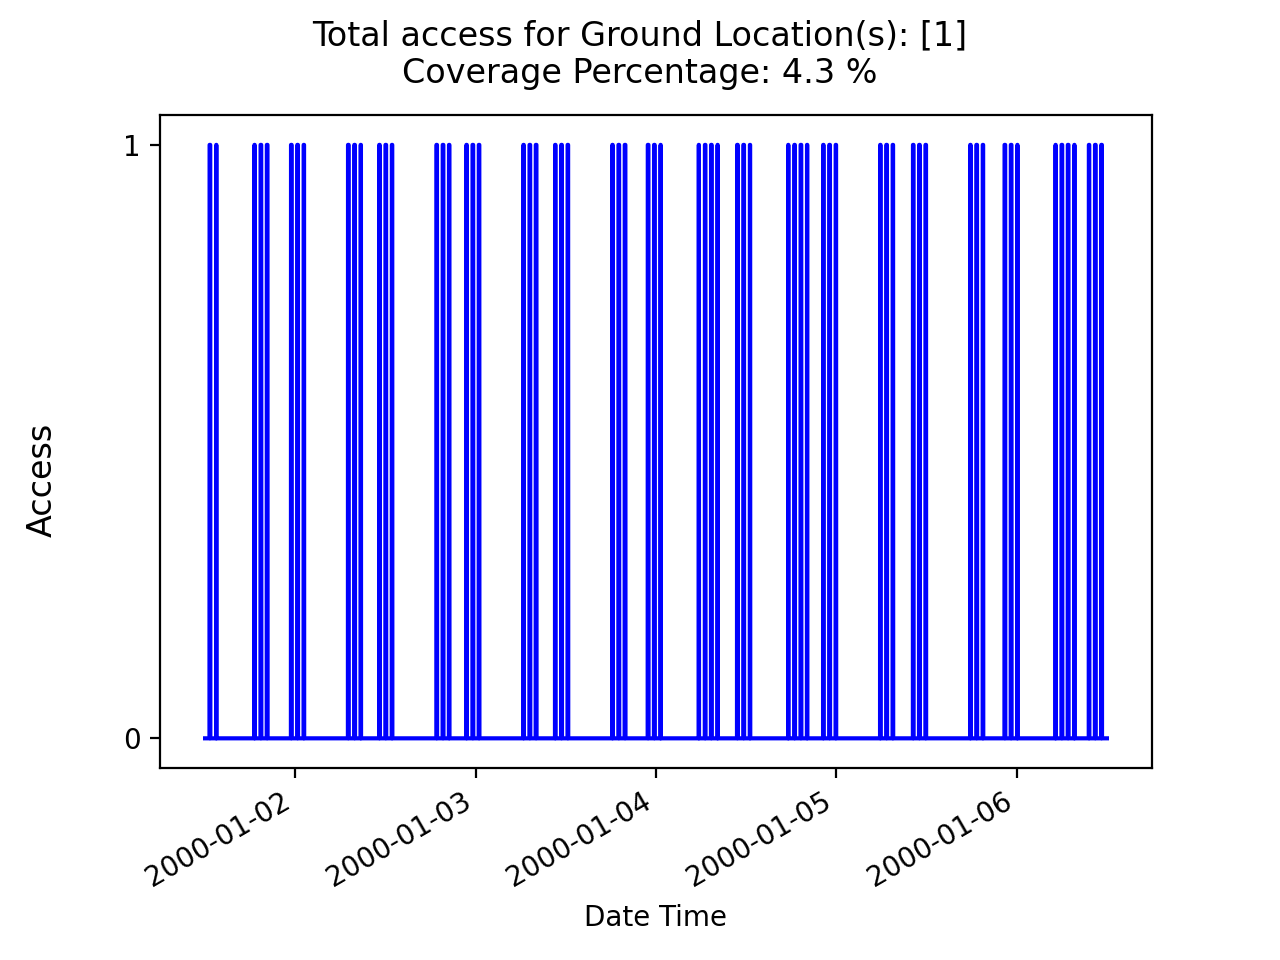

(<AxesSubplot:xlabel='Date Time'>, <Figure size 640x480 with 1 Axes>)

In [47]:
#the 1 in the function is the gs.groundID of the ground station
#If there are multiple ground stations, a different ID could be input to
#collect data from that particular ground station
#1's indicate access, 0 indcate no access
accessObject.plot_total_access(1)

<IPython.core.display.Javascript object>


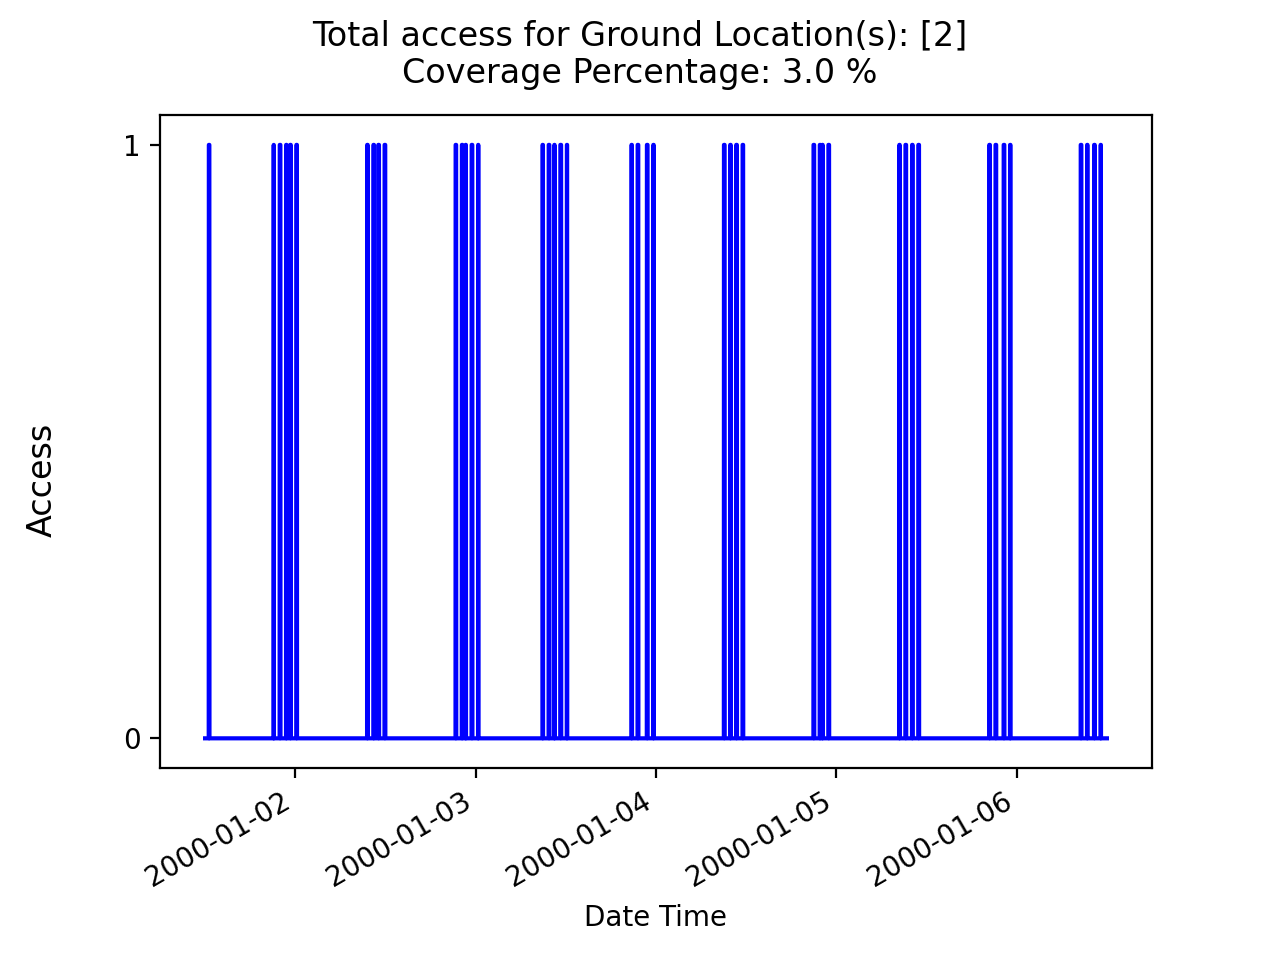

(<AxesSubplot:xlabel='Date Time'>, <Figure size 640x480 with 1 Axes>)

In [48]:
# Plot access for ground station 2
accessObject.plot_total_access(2)

### Tombstone plot all access plots between all satellites and all ground stations

<IPython.core.display.Javascript object>


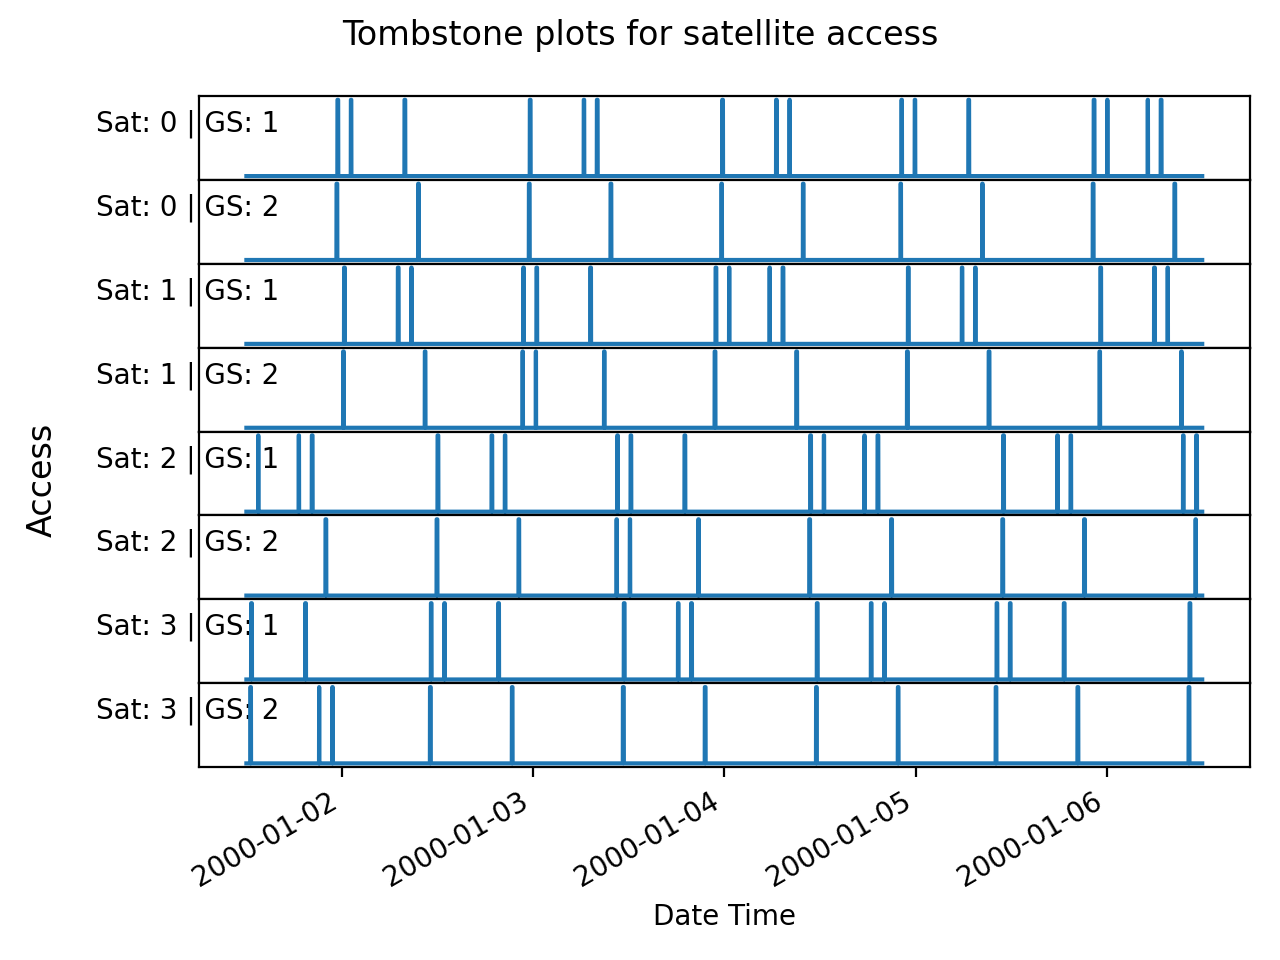

(array([<AxesSubplot:ylabel='Sat: 0 | GS: 1'>,
        <AxesSubplot:ylabel='Sat: 0 | GS: 2'>,
        <AxesSubplot:ylabel='Sat: 1 | GS: 1'>,
        <AxesSubplot:ylabel='Sat: 1 | GS: 2'>,
        <AxesSubplot:ylabel='Sat: 2 | GS: 1'>,
        <AxesSubplot:ylabel='Sat: 2 | GS: 2'>,
        <AxesSubplot:ylabel='Sat: 3 | GS: 1'>,
        <AxesSubplot:xlabel='Date Time', ylabel='Sat: 3 | GS: 2'>],
       dtype=object),
 <Figure size 640x480 with 8 Axes>)

In [52]:
accessObject.plot_all()

### Tombstone plot only some combinations of

<IPython.core.display.Javascript object>


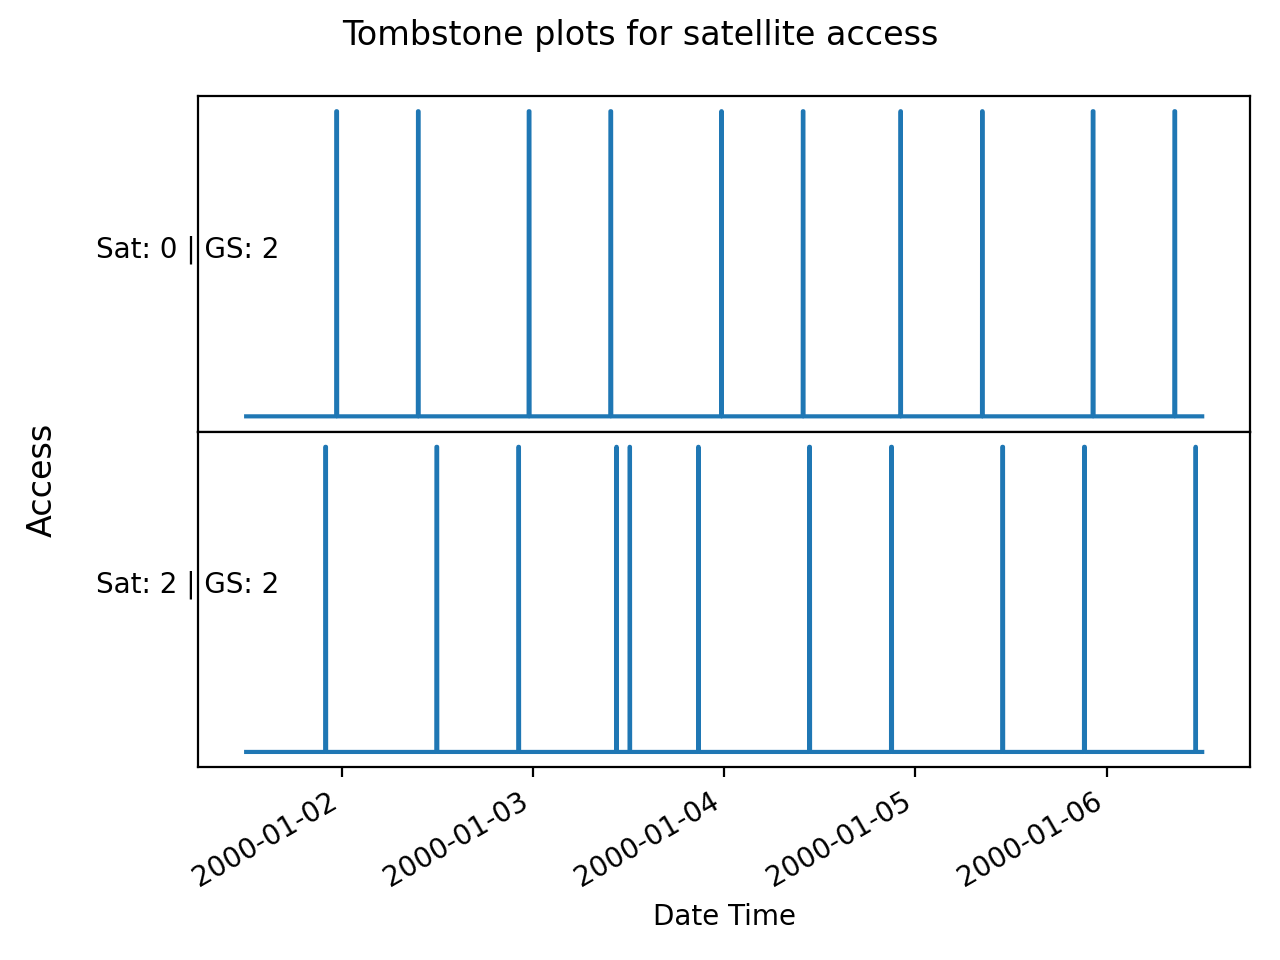

(array([<AxesSubplot:ylabel='Sat: 0 | GS: 2'>,
        <AxesSubplot:xlabel='Date Time', ylabel='Sat: 2 | GS: 2'>],
       dtype=object),
 <Figure size 640x480 with 2 Axes>)

In [54]:
#Plot the tombstone plots for satellite 0 and satellite 2 and ground station 2
accessObject.plot_some([0,2], [2])